In [138]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib
import numpy as np
import pandas as pd
import json

In [127]:
# Assuming you have a CSV file named 'titanic.csv' in the current working directory
titanic_data = pd.read_csv(r'f:\PROJECTS\Classification and Ensamble\titanic_dataset.csv')

# Explore the dataset
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [128]:
# Example preprocessing (you may need more depending on your dataset)
titanic_data = titanic_data.dropna(subset=['Age', 'Embarked'])  # Drop rows with missing values in Age and Embarked
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic_data['Survived']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)


In [131]:
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [132]:
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
gb_pred = gb_model.predict(X_test)


In [133]:
ensemble_model = VotingClassifier(estimators=[('Random Forest', rf_model), ('XGBoost', xgb_model), ('Gradient Boosting', gb_model)], voting='hard')
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)


In [134]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred))


Random Forest Accuracy: 0.7622377622377622
XGBoost Accuracy: 0.7552447552447552
Gradient Boosting Accuracy: 0.7622377622377622
Ensemble Accuracy: 0.7622377622377622


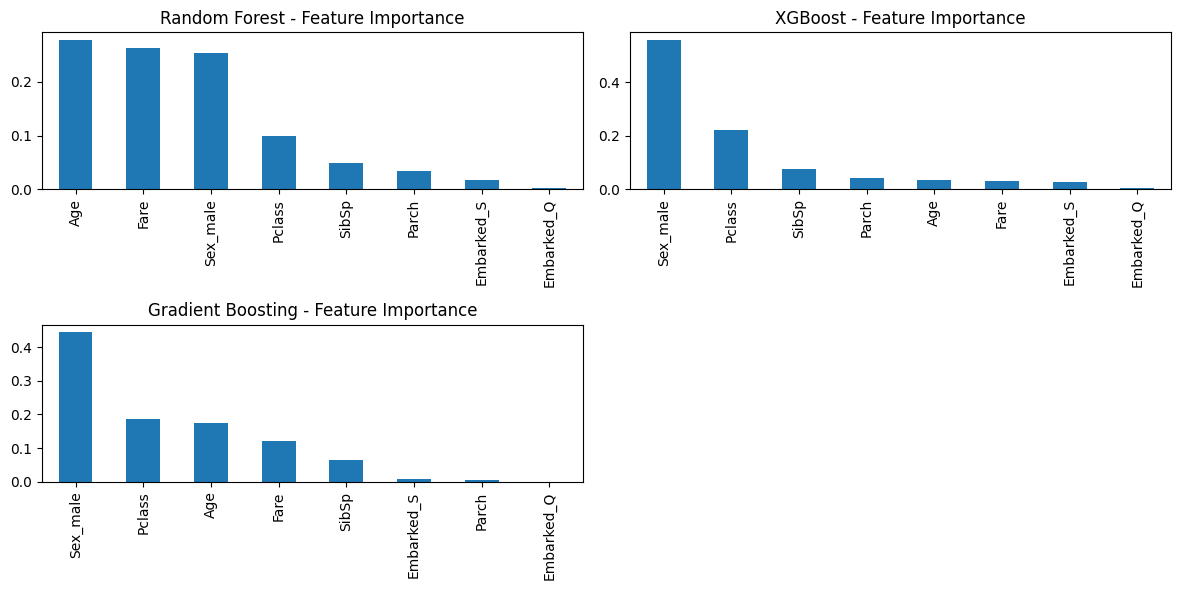

In [136]:
# Visualizations
plt.figure(figsize=(12, 6))

# Feature Importance Plot (Random Forest)
plt.subplot(2, 2, 1)
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance_rf.plot(kind='bar')
plt.title('Random Forest - Feature Importance')

# Feature Importance Plot (XGBoost)
plt.subplot(2, 2, 2)
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance_xgb.plot(kind='bar')
plt.title('XGBoost - Feature Importance')

# Feature Importance Plot (Gradient Boosting)
plt.subplot(2, 2, 3)
feature_importance_gb = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance_gb.plot(kind='bar')
plt.title('Gradient Boosting - Feature Importance')

plt.tight_layout()
plt.show()

In [142]:
# Save the Ensemble Model
joblib.dump(ensemble_model, r'f:\PROJECTS\Classification and Ensamble\main_model.joblib')

['f:\\PROJECTS\\Classification and Ensamble\\main_model.joblib']